<a href="https://colab.research.google.com/github/KLeeDE/ResearchProj_UrbanHeat/blob/master/TimeSeries/20210204_timeseries_gfmf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Update 

1. Add more data (March 13)

2. Load saved pixels instead of loading all images

3. one pixel to average of pixels

4. smooth time series: rolloing, gaussian filter

5. low sampling

6. mathematically understand changepointdetection methods




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import imageio as iio
import matplotlib.pyplot as plt
import os

In [ ]:
print(os.getcwd())

/content


In [ ]:
os.chdir("/content/drive/My Drive/urban_heat/output")
print(os.getcwd())

/content/drive/.shortcut-targets-by-id/158/urban_heat/output


In [ ]:
feat_acs0 = np.load("feat_acs0.npy")
feat_acs0

array([0.99607843, 0.99607843, 0.99607843, ..., 0.91764706, 0.9254902 ,
       0.90196078])

In [ ]:
# March 14-15
feat_acs_all = np.load("feat_acs_all.npy")
feat_bld_all = np.load("feat_bld_all.npy")
feat_sky_all = np.load("feat_sky_all.npy")
feat_win_all = np.load("feat_win_all.npy")

feat_acs_all.shape, feat_bld_all.shape, feat_sky_all.shape, feat_win_all.shape

((30, 11, 11, 3228),
 (150, 11, 11, 3228),
 (30, 11, 11, 3228),
 (150, 11, 11, 3228))

In [ ]:
img1415_300 = np.load("20200314_7pm_0315_4am_300th.npy")
img1415_1000 = np.load("20200314_7pm_0315_4am_1000th.npy")
img1415_all = np.load("20200314_7pm_0315_4am_all.npy")
img1415_300.shape, img1415_1000.shape, img1415_all.shape

((300, 240, 320), (1000, 240, 320), (3228, 240, 320))

In [ ]:
os.chdir("/content")
print(os.getcwd())

/content


In [ ]:
#data = np.load("singapore_ir_1000.npy")
#data.shape
#imshow(data[0])
#figure()
#plot(data[:, 110,141)])
#plt(data[:, 108:113, 139:144].mean(axis=1,2)))
#plt(data[:, 180:185, 292:297].mean(axis=1,2)))
#ckf()
#plt(data[:, 180:185, 292:297].mean(axis=1,2))); ylim(0,1)
#plot(data[:, 180, 97]); ylim(0,1)
#clf()
#plt(data[:, 178:183, 95:100].mean(axis=1,2))); ylim(0,1)
#plt.imshow()
#fig, ax = plt.subplots()
#im = ax.imshow(data[0])

#for ii in range(1000):
#  im.set_data(data[ii])
#  plt.pause(0.01)

#figure()

#plot(data[:,140,88])
#clf()
#plot(data[:, 140, 88], "o")
#plot(data[:, 140, 88], ".")
#clf()
#plot(data[::6, 150, 88], ".")
#clf()
#plot(data[:, 138:143, 86:91].mean(axis=1,2))); ylim(0,1)

#from scipy.ndimage.filters import gaussian_filter as gf
#plot(gf(data[:, 138:143, 86:91].mean(axis=1,2)), 3)); ylim(0,1)
#clf(); (plot(gf(data[:, 138:143, 86:91].mean(axis=1,2)), 3)); ylim(0,1))
#clf(); (plot(gf(data[:, 138:143, 86:91].mean(axis=1,2)), 3)); ylim(0,1))
#clf(); (plot(gf(data[:, 138:143, 86:91].mean(axis=1,2)), 3), '.'); ylim(0,1))

#from scipy.ndimage.filters import median_filter as mf
#clf(); (plot(gf(data[:, 138:143, 86:91].mean(axis=1,2)), 3), '.'); ylim(0,1))


In [ ]:
pname

Text(0.5, 1.0, '7pm-4am, March 14-15, 2020')

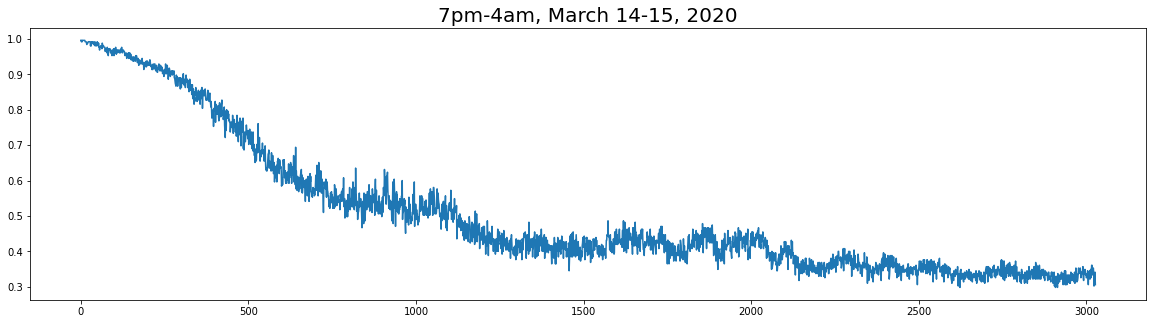

In [ ]:
# Plot
plt.figure(figsize=(20,5))
plt.plot(img1415_all[200:, 110,141])
plt.title("7pm-4am, March 14-15, 2020", fontsize=20)

In [ ]:
200/360

0.5555555555555556

Text(0.5, 1.0, 'Mean of 5 pixels of air conditioner units (7pm-4am, March 14-15, 2020)')

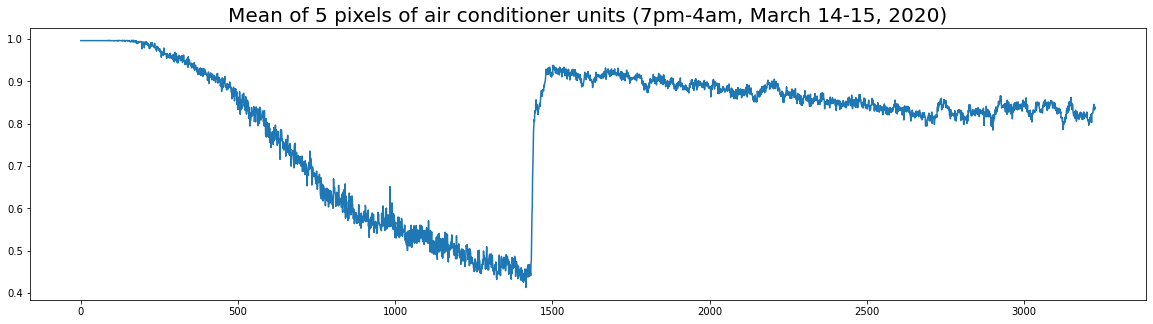

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(img1415_all[:, 180:185, 292:297].mean(axis=(1,2))); ylim=(0,1)
plt.title("Mean of 5 pixels of air conditioner units (7pm-4am, March 14-15, 2020)", fontsize=20)

Text(0.5, 1.0, 'Mean of 5 pixels of air conditioner units (8pm-4am, March 14-15, 2020)')

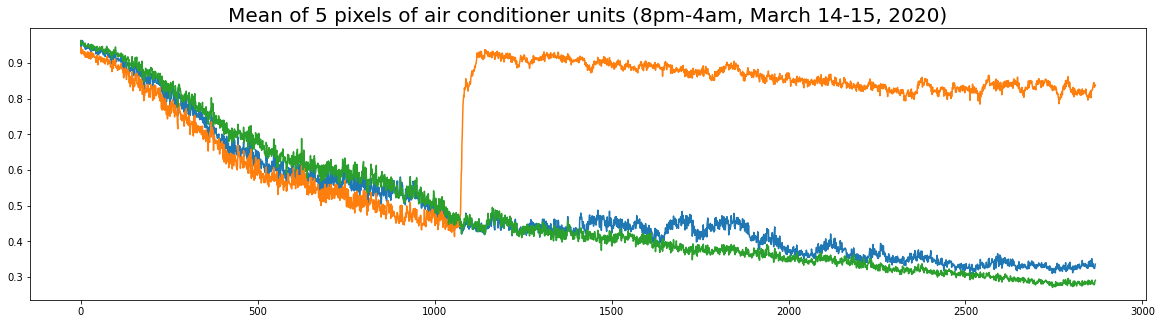

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(img1415_all[360:, 108:113, 139:144].mean(axis=(1,2))); ylim=(0,1)
plt.plot(img1415_all[360:, 180:185, 292:297].mean(axis=(1,2))); ylim=(0,1)
plt.plot(img1415_all[360:, 200:205, 140:145].mean(axis=(1,2))); ylim=(0,1)
plt.plot(img1415_all[360:, 200:205, 140:145].mean(axis=(1,2))); ylim=(0,1)
plt.title("Mean of 5 pixels of air conditioner units (8pm-4am, March 14-15, 2020)", fontsize=20)
plt.xlabel("20:00, ")

In [ ]:
500/360

Text(0.5, 1.0, 'Mean of 5 pixels of air conditioner units (7pm-4am, March 14-15, 2020)')

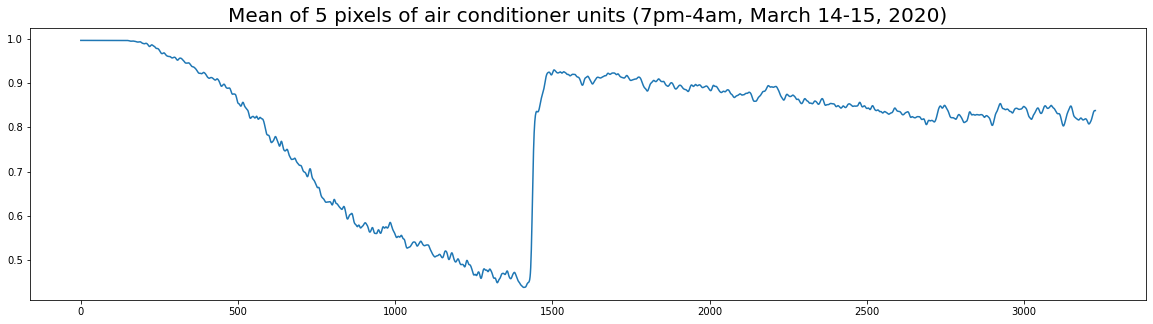

In [ ]:
from scipy.ndimage.filters import gaussian_filter as gf
plt.figure(figsize=(20,5))
plt.plot(gf(img1415_all[:, 180:185, 292:297].mean(axis=(1,2)), 3)); ylim=(0,1)
plt.title("Mean of 5 pixels of air conditioner units (7pm-4am, March 14-15, 2020)", fontsize=20)

Text(0.5, 1.0, 'Mean of 5 pixels of air conditioner units (7pm-4am, March 14-15, 2020)')

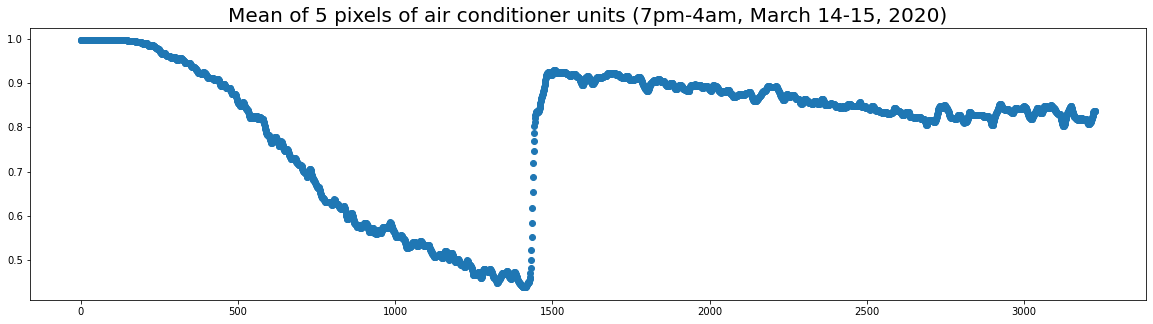

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(gf(img1415_all[:, 180:185, 292:297].mean(axis=(1,2)), 3), 'o'); ylim=(0,1)
plt.title("Mean of 5 pixels of air conditioner units (7pm-4am, March 14-15, 2020)", fontsize=20)

Text(0.5, 1.0, 'Mean of 5 pixels of air conditioner units (7pm-4am, March 14-15, 2020)')

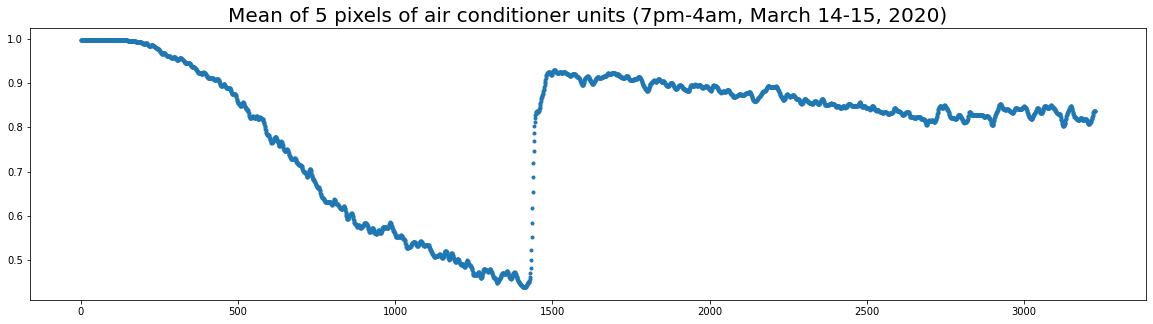

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(gf(img1415_all[:, 180:185, 292:297].mean(axis=(1,2)), 3), '.'); ylim=(0,1)
plt.title("Mean of 5 pixels of air conditioner units (7pm-4am, March 14-15, 2020)", fontsize=20)

Text(0.5, 1.0, 'Mean of 5 pixels of air conditioner units (7pm-4am, March 14-15, 2020)')

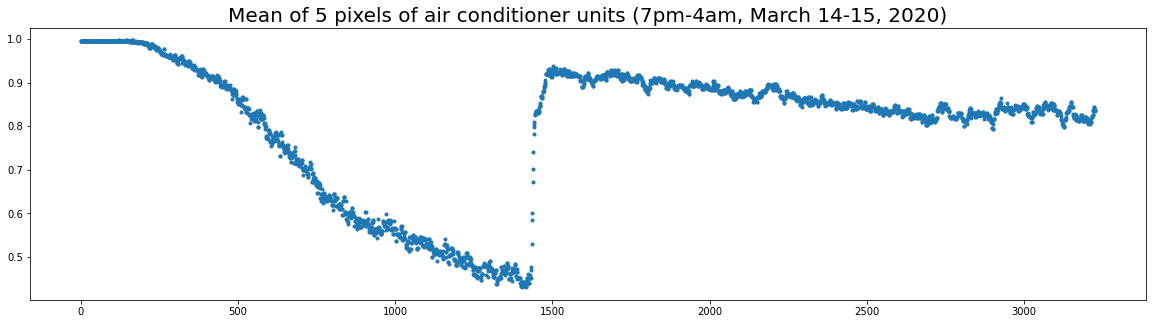

In [ ]:
from scipy.ndimage.filters import median_filter as mf
plt.figure(figsize=(20,5))
plt.plot(mf(img1415_all[:, 180:185, 292:297].mean(axis=(1,2)), 3), '.'); ylim=(0,1)
plt.title("Mean of 5 pixels of air conditioner units (7pm-4am, March 14-15, 2020)", fontsize=20)
#plt.axis(option='auto')

In [ ]:
500/360

1.3888888888888888

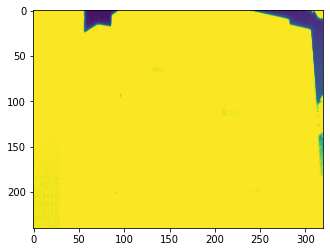

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(img1415_all[0])
for ii in range(1000):
  im.set_data(img1415_all[ii])
  plt.pause(0.01)

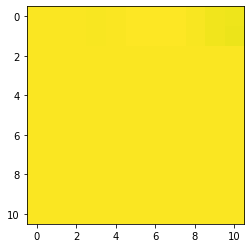

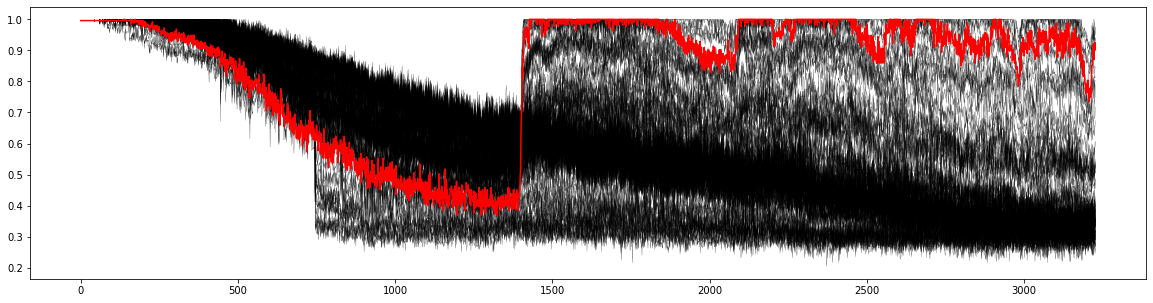

In [ ]:
# Plot - air conditioner
ind = 0
plt.imshow(feat_acs_all[ind][:, :, 90], clim=[0, 1])
plt.figure(figsize=(20,5))
dum = plt.plot(feat_acs_all[ind].reshape(121, 3228).T, "k", lw=0.2)
dum = plt.plot(feat_acs_all[ind][5, 5], "r")

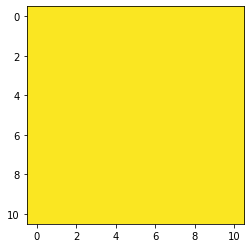

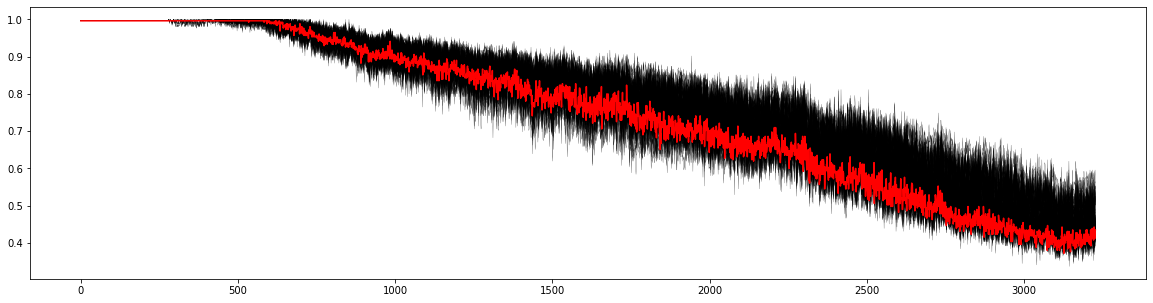

In [ ]:
# Plot - Building
ind = 0
plt.imshow(feat_bld_all[ind][:, :, 90], clim=[0, 1])
plt.figure(figsize=(20,5))
dum = plt.plot(feat_bld_all[ind].reshape(121, 3228).T, "k", lw=0.2)
dum = plt.plot(feat_bld_all[ind][5, 5], "r")

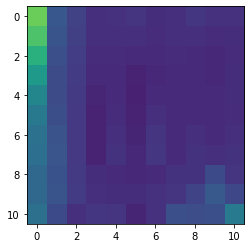

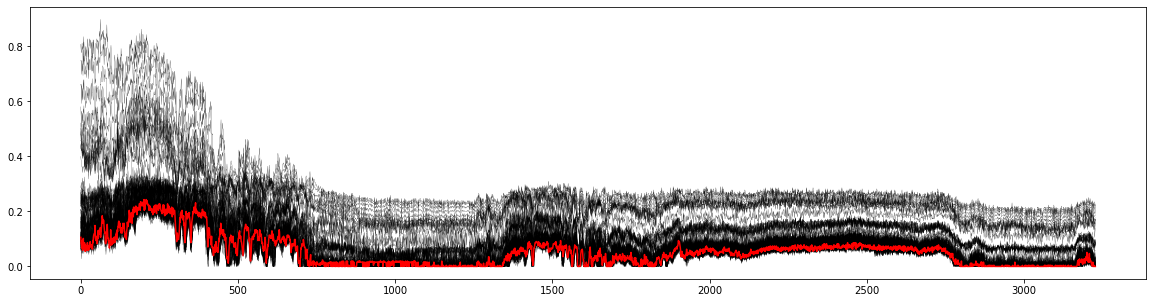

In [ ]:
# Plot - Sky
ind = 0
plt.imshow(feat_sky_all[ind][:, :, 90], clim=[0, 1])
plt.figure(figsize=(20,5))
dum = plt.plot(feat_sky_all[ind].reshape(121, 3228).T, "k", lw=0.2)
dum = plt.plot(feat_sky_all[ind][5, 5], "r")

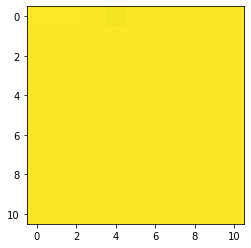

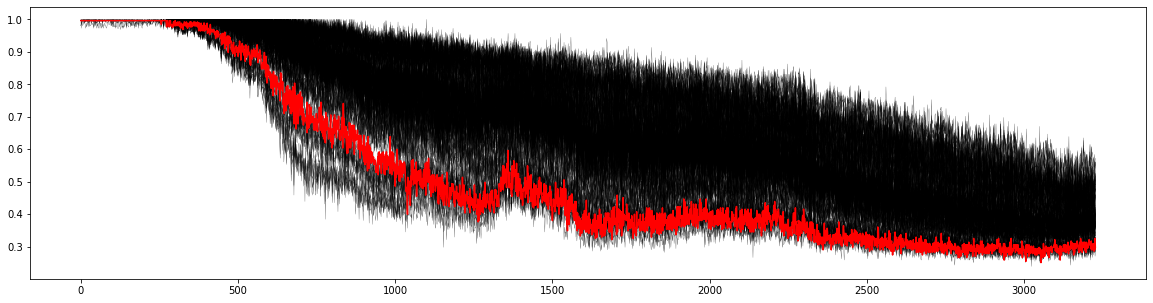

In [ ]:
# Plot - Window
ind = 0
plt.imshow(feat_win_all[ind][:, :, 90], clim=[0, 1])
plt.figure(figsize=(20,5))
dum = plt.plot(feat_win_all[ind].reshape(121, 3228).T, "k", lw=0.2)
dum = plt.plot(feat_win_all[ind][5, 5], "r")

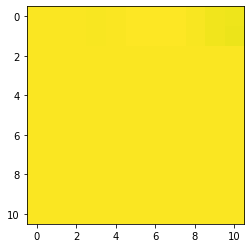

In [ ]:
plt.imshow(feat_acs_all[0][:, :, 90], clim=[0, 1])

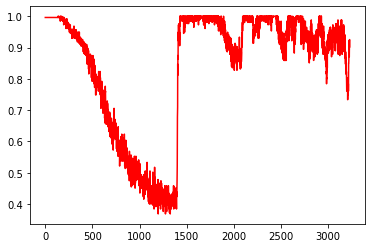

In [ ]:
plt.plot(feat_acs_all[0][5, 5], "r")

In [ ]:
feat_acs_all.shape

(30, 11, 11, 3228)

#Change Point Detection

Text(0.5, 1.0, 'Mean of 5 pixels of air conditioner units (7pm-4am, March 14-15, 2020)')

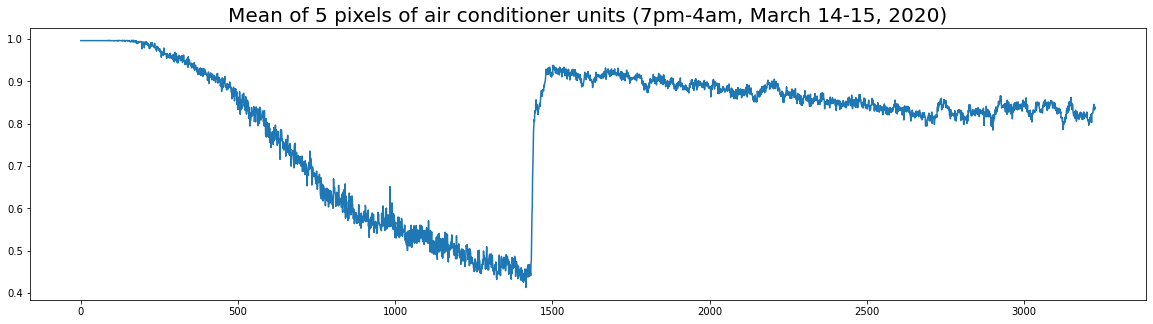

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(img1415_all[:, 180:185, 292:297].mean(axis=(1,2))); ylim=(0,1)
plt.title("Mean of 5 pixels of air conditioner units (7pm-4am, March 14-15, 2020)", fontsize=20)

In [ ]:
!pip install ruptures

     |████████████████████████████████| 706kB 7.9MB/s 


In [ ]:
import ruptures as rpt

In [ ]:
a = img1415_all[:, 180:185, 292:297].mean(axis=(1,2))
a.shape

(3228,)

Text(0.5, 1.0, 'Change Point Detection')

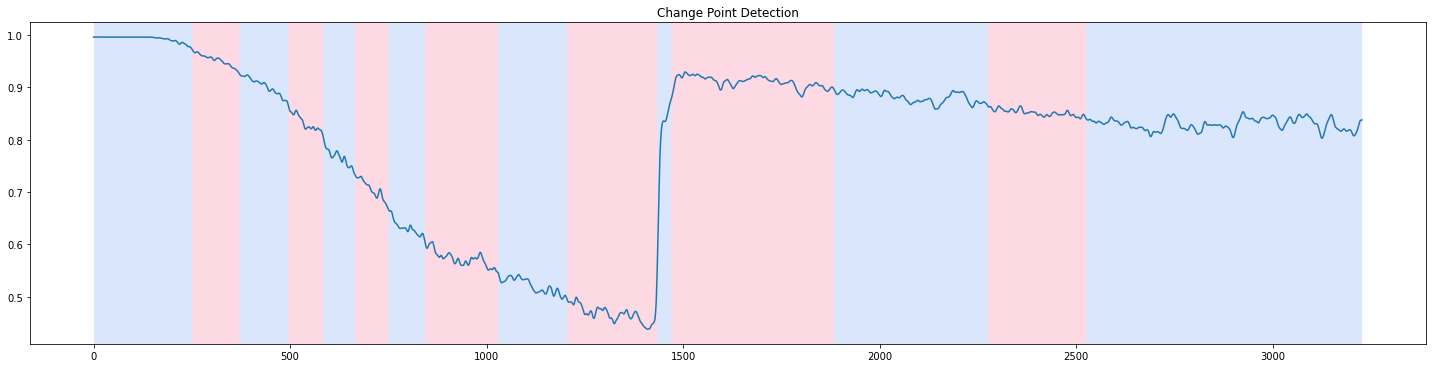

In [ ]:
#points = img1415_all[:, 180:185, 292:297].mean(axis=(1,2))
points = gf(img1415_all[:, 180:185, 292:297].mean(axis=(1,2)), 3)
model = "rbf"

algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(20,5))
plt.title("Change Point Detection")

Text(0.5, 1.0, 'Change Point Detection: Binary Segmentation Search Method')

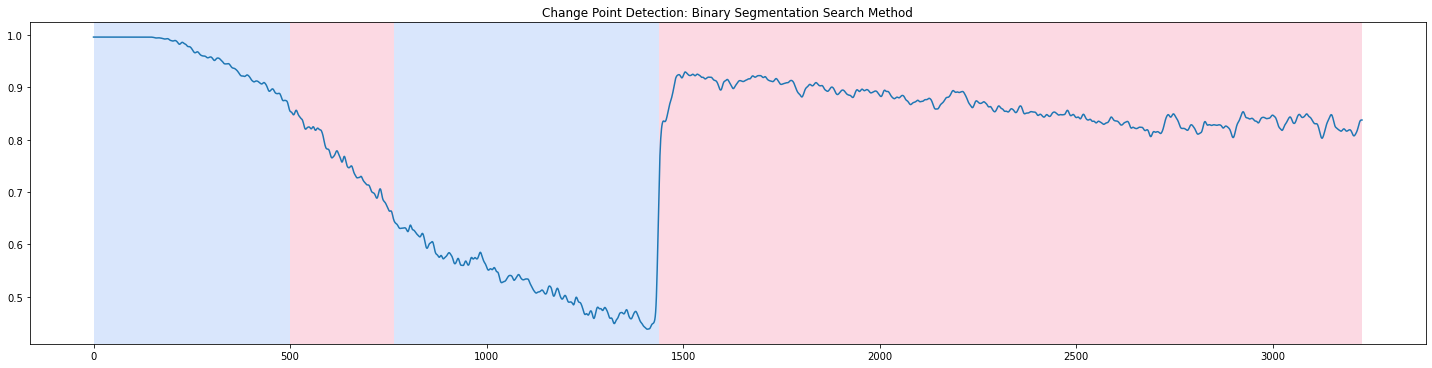

In [ ]:
#points = img1415_all[:, 180:185, 292:297].mean(axis=(1,2))
points = gf(img1415_all[:, 180:185, 292:297].mean(axis=(1,2)), 3)
model = "l2"

algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=3)
rpt.display(points, result, figsize=(20,5))
plt.title("Change Point Detection: Binary Segmentation Search Method")

Binary change point detection is used to perform fast signal segmentation and is implemented in ruptures.detection.BinSeg. It is a sequential approach: first, one change point is detected in the complete input signal, then series is split around this change point, then the operation is repeated on the two resulting sub-signals. See for instance [BSBai97] and [BSFry14] for a theoretical and algorithmic analysis of ruptures.detection.BinSeg. The benefits of binary segmentation includes low complexity (of the order of O(nlogn)O(nlog⁡n), where nn is the number of samples), the fact that it can extend any single change point detection method to detect multiple changes points and that it can work whether the number of regimes is known beforehand or not.

https://ctruong.perso.math.cnrs.fr/ruptures-docs/build/html/detection/binseg.html



Text(0.5, 1.0, 'Change Point Detection: Binary Segmentation Search Method')

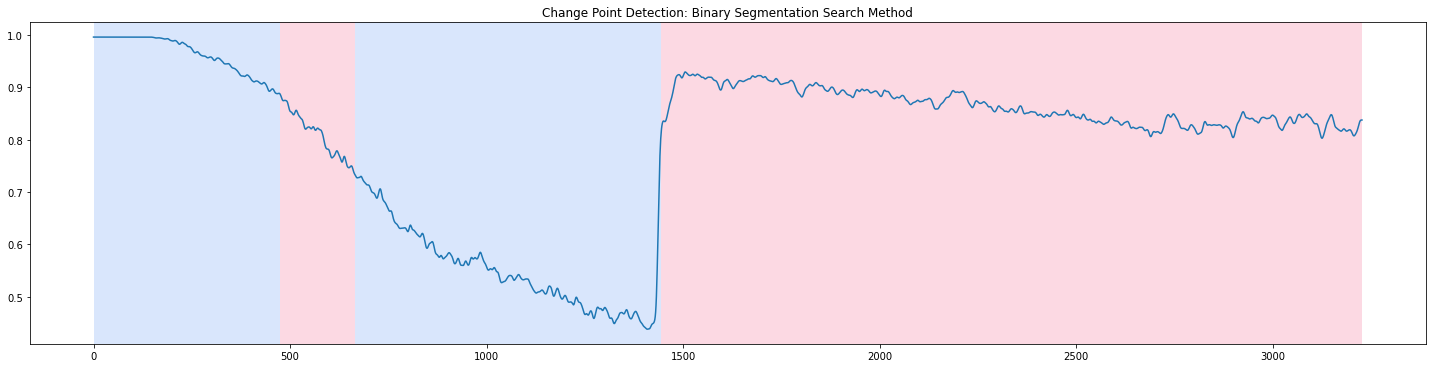

In [ ]:
#points = img1415_all[:, 180:185, 292:297].mean(axis=(1,2))
points = gf(img1415_all[:, 180:185, 292:297].mean(axis=(1,2)), 3)
model = "l2" # "l1", "rbf", "linear", "normal", "ar"

n_bkps , sigma = 3,5 #n_bkps = number of chnage points, noise standard deviation
#n = 500 #number of samples
#signal, bkps = rpt.pw_constant(n, dim, n_bkps, noise_std=sigma)

algo = rpt.Binseg(model=model).fit(points)
result = algo.predict(n_bkps=3) 
rpt.display(points, result, figsize=(20,5))
plt.title("Change Point Detection: Binary Segmentation Search Method")

In [ ]:
result

[475, 665, 1445, 3228]

# Time between ons and offs

(array([2., 0., 0., 1., 0., 0., 0., 0., 0., 1.]),
 array([ 475. ,  750.3, 1025.6, 1300.9, 1576.2, 1851.5, 2126.8, 2402.1,
        2677.4, 2952.7, 3228. ]),
 <a list of 10 Patch objects>)

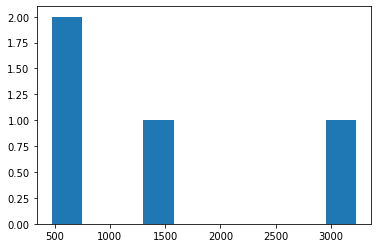

In [ ]:
plt.hist(result)